##### Problem Set 1, due April 5th at 5:30pm 


###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
# #IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.1.0 (need at least 1.0)
Numpy version:        1.13.1 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Mapltolib version:     2.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.0 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [5]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [6]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [17]:
query = (flights_df.dest == 'SEA' )  
dest_is_SEA_df = flights_df[query] # filtering with Series condition
len(dest_is_SEA_df) # couunt number of rows


3923

There were __3923__ flights from NYC to Seattle in 2013.  

(b) How many airlines fly from NYC to Seattle?

In [19]:
# get a Series of unique carrier from filered dataframe
airlines_from_NYC_to_SEA = dest_is_SEA_df.carrier.unique()
len(airlines_from_NYC_to_SEA) # get Series length 



5

There are __5__ airlines fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [23]:
# get a Series of unique tailnum from filered dataframe
unique_airplanes_from_NYC_to_SEA = dest_is_SEA_df.tailnum.unique() 
len(unique_airplanes_from_NYC_to_SEA) # get Series length 



936

There are __936__ unique air planes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [30]:
dest_is_SEA_df.arr_delay.mean() # get mean of arr_delay column in the filered dataframe

-1.0990990990990992

The average arrival delay for flights from NC to Seattle is -1.0990990990990992 minutes.


(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [71]:
total = len(dest_is_SEA_df)

# Solution 1:
# use Series filtering to get dataframes of specific origins, 
# and calculate proportions by 
# `number_of_flights_from_specific_origin / total'

def get_prop_with_origin(origin):
    query = (dest_is_SEA_df.origin == origin)  
    return len(dest_is_SEA_df[query]) / total 

JFK_SEA = get_prop_with_origin('JFK')
LGA_SEA = get_prop_with_origin('LGA')
EWR_SEA = get_prop_with_origin('EWR')

print('Solution 1: ')
print('JFK_SEA: {:.4f}'.format(JFK_SEA))
print('EWR_SEA: {:.4f}'.format(EWR_SEA))
print('LGA_SEA: {:.4f}'.format(LGA_SEA))

print()


# Solution 2:
# group dataframe by 'origin', use .size() to get the size of each group,
# and calculate proportion by `size of each specific group / total`
grouped = dest_is_SEA_df.groupby('origin')
dest_is_SEA_df.groupby('origin').size()

print('Solution 2: ')
print('JFK_SEA: {:.4f}'.format(grouped.size()['JFK'] / total))
print('EWR_SEA: {:.4f}'.format(grouped.size()['EWR'] / total))
print('LGA_SEA: {:.4f}'.format(0))

Solution 1: 
JFK_SEA: 0.5333
EWR_SEA: 0.4667
LGA_SEA: 0.0000

Solution 2: 
JFK_SEA: 0.5333
EWR_SEA: 0.4667
LGA_SEA: 0.0000


- JFK - SEA: 0.5333
- EWR - SEA: 0.4667
- LGA - SEA: 0.0000

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [102]:
# subset relavant columns
sub_df = flights_df[['month', 'day', 'dep_delay', 'arr_delay']]

grouped = sub_df.groupby(['month', 'day']).mean()
max_dep_delay = grouped[grouped['dep_delay'] == grouped.dep_delay.max()]
max_arr_delay = grouped[grouped['arr_delay'] == grouped.arr_delay.max()]

print(max_dep_delay)
print()
print(max_arr_delay)

           dep_delay  arr_delay
month day                      
3     8    83.536921  85.862155

           dep_delay  arr_delay
month day                      
3     8    83.536921  85.862155


3/8 is the day that has both the largest average departure delay and the largest average arrival delay.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [122]:
sub_df = flights_df[['month', 'day', 'dep_delay']]
delayed_df = sub_df[sub_df.dep_delay > 0]

aggregated = delayed_df.groupby(['month', 'day']).size()
aggregated_df = aggregated.reset_index(name="dep_delay")

aggregated_df[aggregated_df.dep_delay == aggregated.max()] 

,month,day,dep_delay
356,12,23,674


 -- Write your answer in English here -- 

(c) Are there any seasonal patterns in departure delays for flights from NYC?

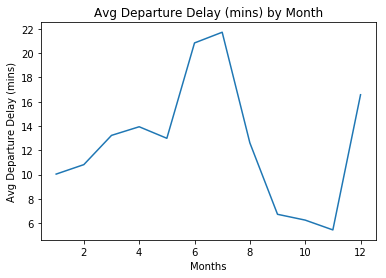

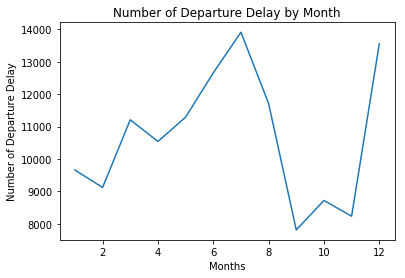

In [127]:
dep_deplay_df = sub_df.groupby('month')['dep_delay']
plt.plot(dep_deplay_df.mean())
plt.xlabel('Months')
plt.ylabel('Avg Departure Delay (mins)')
plt.title('Avg Departure Delay (mins) by Month')
plt.show()

with_dep_deplay_df = sub_df[sub_df.dep_delay > 0]
grouped = with_dep_deplay_df.groupby('month')['dep_delay']
plt.plot(grouped.count())
plt.xlabel('Months')
plt.ylabel('Number of Departure Delay')
plt.title('Number of Departure Delay by Month')
plt.show()


 -- Write your answer in English here -- 

(d) On average, how do departure delays vary over the course of a day?

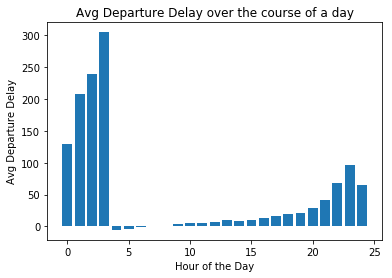

In [156]:
dep_delay_hour = flights_df.groupby('hour')['dep_delay'].mean().reset_index(name="dep_delay")

plt.bar(range(25), dep_delay_hour.dep_delay)
plt.xlabel('Hour of the Day')
plt.ylabel('Avg Departure Delay')
plt.title('Avg Departure Delay over the course of a day')
plt.show()

 -- Write your answer in English here -- 

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [166]:
flights_df['speed'] = flights_df.distance / flights_df.air_time
flights_df[flights_df.speed == flights_df['speed'].max()]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,11.723077


 -- Write your answer in English here -- 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [174]:
grouped_flights_df = flights_df.groupby(['carrier', 'flight', 'dest']).size().reset_index(name="frequencies")
grouped_flights_df[grouped_flights_df.frequencies == 365]


,carrier,flight,dest,frequencies
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


 -- Write your answer in English here -- 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


In [ ]:
# Your code here

 -- Enter your discussion here --

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [ ]:
# Your code here

-- Enter your interpretation here --